<a href="https://colab.research.google.com/github/Skkuhodomo/Deep_learning_cat-dog-/blob/main/CATorDOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import cv2
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
import tensorflow as tf


data_train, ds_info = tfds.load('cats_vs_dogs', split =[tfds.Split.TRAIN], with_info=True)
ds_info



images = [one['image'].numpy() for one in data_train[0].take(30)]
len(images)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete0KVO86/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


30

(-0.5, 499.5, 374.5, -0.5)

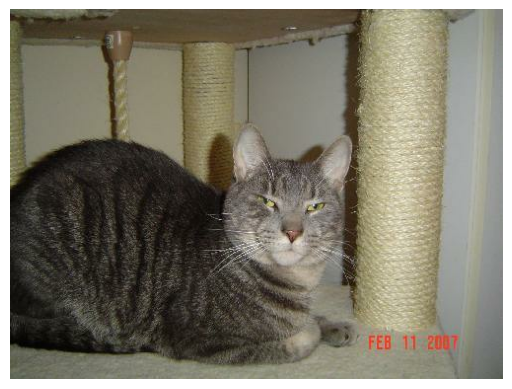

In [3]:
plt.imshow(images[12])
plt.axis('off')

In [4]:
resnet50_pre = tf.keras.applications.resnet.ResNet50(weights='imagenet', input_shape=(224,224,3))
resnet50_pre.summary()

102967424/102967424 [==============================] - 0s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                    

In [5]:
from tensorflow.keras.applications.imagenet_utils import decode_predictions

def pred_img(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    img_resized = cv2.resize(img, (224,224))
    pred = resnet50_pre.predict(img_resized.reshape([1,224,224,3]))
    decoded_pred = decode_predictions(pred)

    for i, instance in enumerate(decoded_pred[0]):
      print('{}위: {} ({:.2f}%)'.format(i+1, instance[1], instance[2]*100))

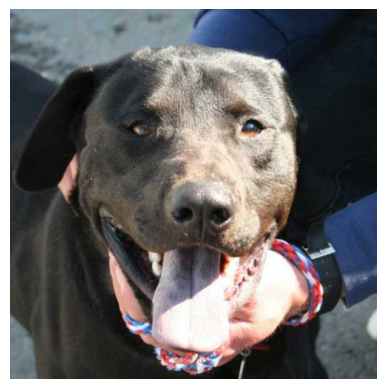

35363/35363 [==============================] - 0s 0us/step
1위: American_Staffordshire_terrier (79.58%)
2위: Weimaraner (8.67%)
3위: Great_Dane (3.24%)
4위: bull_mastiff (2.97%)
5위: Staffordshire_bullterrier (2.26%)


In [6]:
pred_img(images[10])